# Patterns in Bike Sharing Data
====================
---
<br>
Statistics Department, UC Davis<br>
&copy; 2018

# Background
<br>
Citi Bike is the nation's largest bike share program, with 12,000 bikes and 750 stations across Manhattan, Brooklyn, and Queens. It was designed for quick trips with convenience in mind, and it’s a fun and affordable way to get around town.

As a transportation system, bike shares are ideally designed for densely populated cities like New York. Importantly, Bike shares offer options for economic growth and job creation, as well as providing considerable health benefits. 

# Data
We downloadable files of Citi Bike 2014 trip data. The data includes:
* Trip Duration (seconds)
* Start Time and Date
* Stop Time and Date
* Start Station Name
* End Station Name
* Station ID
* Station Lat/Long
* Bike ID
* User Type (Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member)
* Gender (Zero=unknown; 1=male; 2=female)
* Year of Birth
<br><br>
This data has been processed to remove trips that are taken by staff as they service and inspect the system, and any trips that were below 60 seconds in length.
<br>
Other demographic information, such as race/ethnicity, income and educa onal status may also impact bicycle use but the data available does not allow this report to explore these factors.

# Analysis
<br>
And we plan to analyze data in following aspects:.
* Usage in each month for year 2014
* Distribution of total usage in each hour on week and weekend in July and December
* Distribution of trip duration in different parts of time oon week and weekend in July and December
* Age and gender proportion of bike users
* Plotting maps of every station and usage distribution

#### For each aspect, we use visualization to find the patterns.

# 1. Analysis of Bike Usage Frequency during Different Times
<br>
__Bike sharing system__ is regarded as one of the most popular and healthy transportation vehicle in those big and crowded cities such as New York. It can get you through your daily commute with super ease and extremely low cost. Hence, for City Bike(bike sharing system here) operator, it’s important to know how to improve the user experience and maximize profit. We think one of the most important things here is knowing bike usage trend at different times. <br><br>Based on that, the operator can reallocation bike recourses and optimize business management.


In [1]:
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt

Load data file:

In [2]:
bike_2014_7=pd.read_csv("201407-citibike-tripdata.csv")

Total records in July:

In [3]:
bike_2014_7.count()[0]

968842

Glance of data frame we are analyzing:

In [4]:
bike_2014_7.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,404,2014-07-01 00:00:04,2014-07-01 00:06:48,545,E 23 St & 1 Ave,40.736502,-73.978095,402,Broadway & E 22 St,40.740343,-73.989551,19578,Subscriber,1987,2
1,850,2014-07-01 00:00:06,2014-07-01 00:14:16,238,Bank St & Washington St,40.736197,-74.008592,458,11 Ave & W 27 St,40.751396,-74.005226,19224,Subscriber,1987,1
2,1550,2014-07-01 00:00:21,2014-07-01 00:26:11,223,W 13 St & 7 Ave,40.737815,-73.999947,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,17627,Subscriber,1973,2
3,397,2014-07-01 00:00:29,2014-07-01 00:07:06,224,Spruce St & Nassau St,40.711464,-74.005524,2008,Little West St & 1 Pl,40.705693,-74.016777,15304,Subscriber,1982,1
4,609,2014-07-01 00:00:37,2014-07-01 00:10:46,346,Bank St & Hudson St,40.736529,-74.006180,521,8 Ave & W 31 St,40.750450,-73.994811,20062,Subscriber,1972,2


### bike_2014_7.dtypes

In [6]:
day=pd.to_datetime((bike_2014_7["starttime"]).values).day
bike_2014_7["day"]=day
hour=pd.to_datetime((bike_2014_7["starttime"]).values).hour
bike_2014_7["hour"]=hour

# 1.1 Bike usage in different months 

Load records for every month in 2014 and count sum for each month:

In [7]:
import os
files = os.listdir("C:/Users/dell/Desktop/141b final project")
files_xls = [f for f in files if f[-3:] == 'csv']
files_xls
bikes_by_month = []
for f in files_xls:
    data = pd.read_csv(f)
    count=data.count().values[0]
    bikes_by_month.append(count)

Show total bike usage for each month:

In [8]:
df_bikes_by_month=pd.DataFrame()
month=[1,2,3,4,5,6,7,8,9,10,11,12]
df_bikes_by_month["count"]=bikes_by_month
df_bikes_by_month["month"]=month
df_bikes_by_month

,count,month
0,300400,1
1,224736,2
2,439117,3
3,670780,4
4,866117,5
5,936880,6
6,968842,7
7,963489,8
8,953887,9
9,828711,10


Data visualization for bike usage for 12 months in 2014:

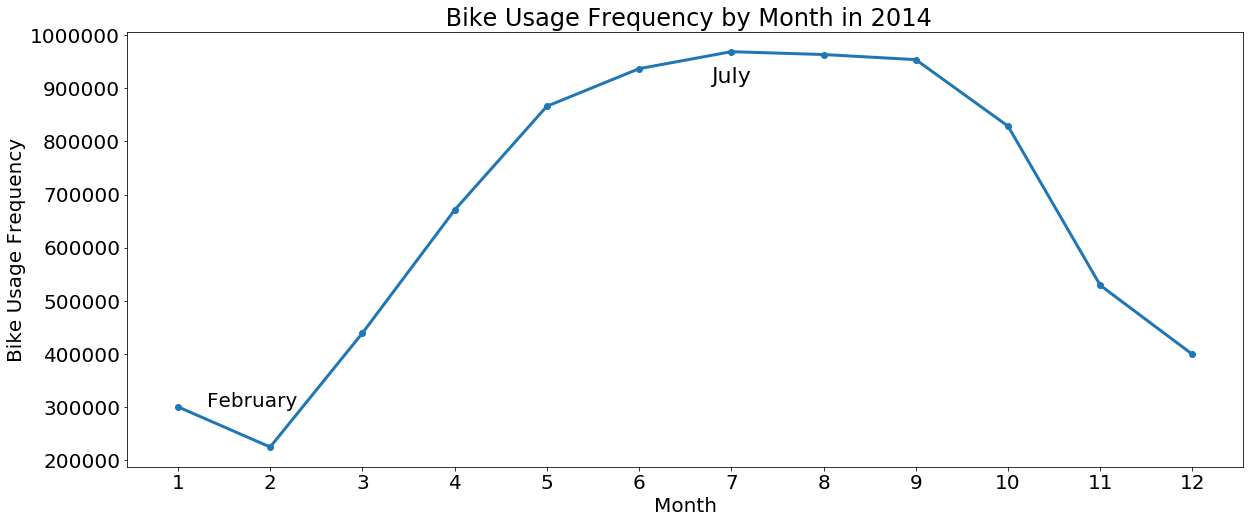

In [9]:
plt.figure(figsize=(20,8))
plt.plot( "month","count",data=df_bikes_by_month, linestyle='-', marker='o',lw=3)
plt.locator_params(nbins=20, axis='x') #x axis tick more frequency
plt.xticks(fontsize=20) #set x tick font size
plt.yticks(fontsize=20)
#plt.ylim((0,2000))
plt.text(7, 910000, "July",
             fontsize=22, ha='center')
plt.text(1.8, 300000, "February",
             fontsize=20, ha='center')
plt.xlabel("Month",fontsize=20)
plt.ylabel("Bike Usage Frequency",fontsize=20)
plt.title(" Bike Usage Frequency by Month in 2014",fontsize=24)
plt.show()

Firstly, we investigate the total monthly bike usage during 2014 to check if there are any seasonal effects.  Apparently, the bike usage data reach the maximum at July for 2014 and stays at plateau for the whole summer. However, in winter time such as December, January and February, the bike usage hits bottom, especially for February which is the minimum for the whole year. So here is an obvious trend that people tend to use sharing bikes more at summer time, and bike less during winter time.
<br><br>
When tracing back to history temperature in New York in 2014, we find that the lowest average temperature appeared in January and February, which were -2 ℃  and 0℃ , and with 5 cm and 12 cm of snow. So it’s not surprising that people did not choose bikes in such kind of bad weather. On the contrary, the snow melt and temperature went up since March. From June to August, the temperature kept within 20 ℃ to 24 ℃, and most days were sunny days, which made it suitable for riding outside. So for operator, it’s better to arrange more bikes during summer time and less during winter, and an even wiser way is to follow the weather forecast and rearrange accordingly. 

# 1.2 Bike usage pattern during different hours in one day 

Pick three Mondays in July 7/7,7/14,7/21 as representatives of weekdays:

In [10]:
bike_7_Mon=bike_2014_7[((bike_2014_7["day"]).values==7)|((bike_2014_7["day"]).values==14)|((bike_2014_7["day"]).values==21)]

In [ ]:
db = sql.connect("database.sqlite")
bike_7_Mon.to_sql("bike_July_Mon", db)
bike_July_Mon=pd.read_sql("SELECT * FROM bike_July_Mon", db)

In [13]:
bike_July_Mon_byhour=pd.read_sql("SELECT hour,count(*)as count FROM bike_July_Mon group by hour", db)
bike_July_Mon_byhour["averaged_count"]=round(bike_July_Mon_byhour["count"]/3)#average three Monday's

Bike usage counts during different on weekdays:

In [14]:
bike_July_Mon_byhour

,hour,count,averaged_count
0,0,497,166.0
1,1,269,90.0
2,2,158,53.0
3,3,124,41.0
4,4,134,45.0
5,5,617,206.0
6,6,2574,858.0
7,7,5124,1708.0
8,8,8697,2899.0
9,9,6387,2129.0


Pick three Saturdays in July 7/12,7/19,7/26 as representatives of weekends:

In [15]:
bike_7_Sat=bike_2014_7[((bike_2014_7["day"]).values==12)|((bike_2014_7["day"]).values==19)|((bike_2014_7["day"]).values==26)]

In [ ]:
bike_7_Sat.to_sql("bike_July_Sat", db)

In [17]:
bike_July_Sat_byhour=pd.read_sql("SELECT hour,count(*)as count FROM bike_July_Sat group by hour", db)
bike_July_Sat_byhour["averaged_count"]=round(bike_July_Sat_byhour["count"]/3)#average three Saturday's
bike_July_Sat_byhour

,hour,count,averaged_count
0,0,1473,491.0
1,1,980,327.0
2,2,662,221.0
3,3,527,176.0
4,4,315,105.0
5,5,197,66.0
6,6,568,189.0
7,7,1114,371.0
8,8,2154,718.0
9,9,3516,1172.0


Data visualization for bike usage pattern on weekdays and weekends in July:

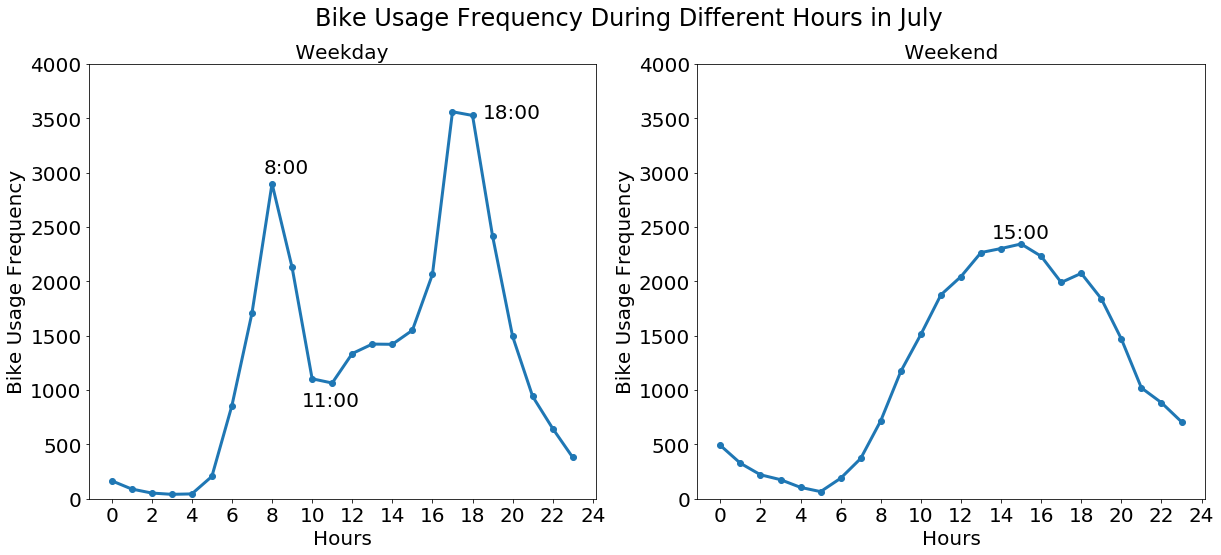

In [18]:
from pylab import *
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
plt.plot( 'hour', 'averaged_count', data=bike_July_Mon_byhour, linestyle='-', marker='o',lw=3)
plt.locator_params(nbins=20, axis='x') #x axis tick more frequency
plt.xticks(fontsize=20) #set x tick font size
plt.yticks(fontsize=20)
plt.ylim((0,4000))
plt.xlabel("Hours",fontsize=20)
plt.ylabel("Bike Usage Frequency",fontsize=20)
#Bike Usage Frequency During Different Hours on Weekday in July
plt.title(" Weekday ",fontsize=20)
plt.annotate('8:00',xy=(1,1), xytext=(7.6,3000),fontsize=20
            )
plt.annotate('11:00',xy=(1,1), xytext=(9.5,850),fontsize=20
            )
plt.annotate('18:00',xy=(1,1), xytext=(18.5,3500),fontsize=20
            )
#plt.ylim((min(bike_July_Mon_byhour["averaged_count"].values),max(bike_July_Mon_byhour["averaged_count"].values)))
plt.subplot(1, 2, 2)
plt.plot( 'hour', 'averaged_count', data=bike_July_Sat_byhour, linestyle='-', marker='o',lw=3)
plt.locator_params(nbins=20, axis='x') 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.ylim((min(bike_July_Mon_byhour["averaged_count"].values),max(bike_July_Mon_byhour["averaged_count"].values)))
plt.ylim((0,4000))
plt.xlabel("Hours",fontsize=20)
plt.ylabel("Bike Usage Frequency",fontsize=20)
#Bike Usage Frequency During Different Hours on Weekends in July
plt.title(" Weekend ",fontsize=20)
plt.text(15, 2400, "15:00",
             fontsize=20, ha='center')

#plt.annotate('10:00',xy=(1,1), xytext=(9.5,1800),fontsize=20   #don't know why plt.annotate does not work for second plot
 #           )
#plt.annotate('18:00',xy=(1,1), xytext=(18,6000),fontsize=20
         #   )
fig = gcf()
fig.suptitle("Bike Usage Frequency During Different Hours in July", fontsize=24)
plt.show()

When looking at data, we have plenty of bike trip records at anytime during a year. These records have labels of dates and times. Here, we are interested in looking for patterns of bike usage frequency in different hours during one day.  Also, our another hypothesis is that the bike usage pattern are different between weekdays and weekends because people may ride sharing bike to work on weekdays. So here, we take bike trips data on __weekdays__ in July and analyze the average bike usage during each hour in one day. The result indicates there are two peaks during a day. One is 8:00 a.m. and the other is 18:00 p.m., which is approximately the rush hours for work.  Also, we can see the bike usage fall rapidly before or after rush hours. These results may imply that on weekdays, a large proportion of bike usage is attributed to work commute.  
<br>When looking at data on __weekends__, we are surprised that the patterns are quite different from that on weekdays. Unlike the double peak on weekdays, the bike usage reaches the only peak at 15:00 p.m. and falls slowly before or after that time. This may imply that on weekends, people do not have a certain time to use bikes. They may ride sharing bikes for family trips or shopping. Typically, 15:00 p.m. is also the most active time for most people during one day. Also, the bike usage is relatively less than weekdays.

Data analysis for bike usage during different hours on weekdays and weekends in December:

In [19]:
#December Mondays:
bike_2014_12=pd.read_csv("201412-citibike-tripdata.csv")
day=pd.to_datetime((bike_2014_12["starttime"]).values).day
bike_2014_12["day"]=day
hour=pd.to_datetime((bike_2014_12["starttime"]).values).hour
bike_2014_12["hour"]=hour
#Pick three Mondays in Dec 12/8,12/15,12/22
bike_12_Mon=bike_2014_12[((bike_2014_12["day"]).values==8)|((bike_2014_12["day"]).values==15)|((bike_2014_12["day"]).values==22)]

bike_12_Mon.to_sql("bike_Dec_Mon", db)
bike_Dec_Mon=pd.read_sql("SELECT * FROM bike_Dec_Mon", db)
bike_Dec_Mon_byhour=pd.read_sql("SELECT hour,count(*)as count FROM bike_Dec_Mon group by hour", db)
bike_Dec_Mon_byhour["averaged_count"]=round(bike_Dec_Mon_byhour["count"]/3)#average three Monday's

In [20]:
bike_Dec_Mon_byhour

,hour,count,averaged_count
0,0,263,88.0
1,1,131,44.0
2,2,78,26.0
3,3,74,25.0
4,4,81,27.0
5,5,369,123.0
6,6,1471,490.0
7,7,2880,960.0
8,8,4912,1637.0
9,9,3834,1278.0


In [21]:
#December Saturdays:
#Pick three Saturdays in Dec 12/13,12/20,12/27
bike_12_Sat=bike_2014_12[((bike_2014_12["day"]).values==13)|((bike_2014_12["day"]).values==20)|((bike_2014_12["day"]).values==27)]

#bike_12_Sat.to_sql("bike_Dec_Sat", db)
bike_Dec_Sat=pd.read_sql("SELECT * FROM bike_Dec_Sat", db)
bike_Dec_Sat_byhour=pd.read_sql("SELECT hour,count(*)as count FROM bike_Dec_Sat group by hour", db)
bike_Dec_Sat_byhour["averaged_count"]=round(bike_Dec_Sat_byhour["count"]/3)#average three Saturday's

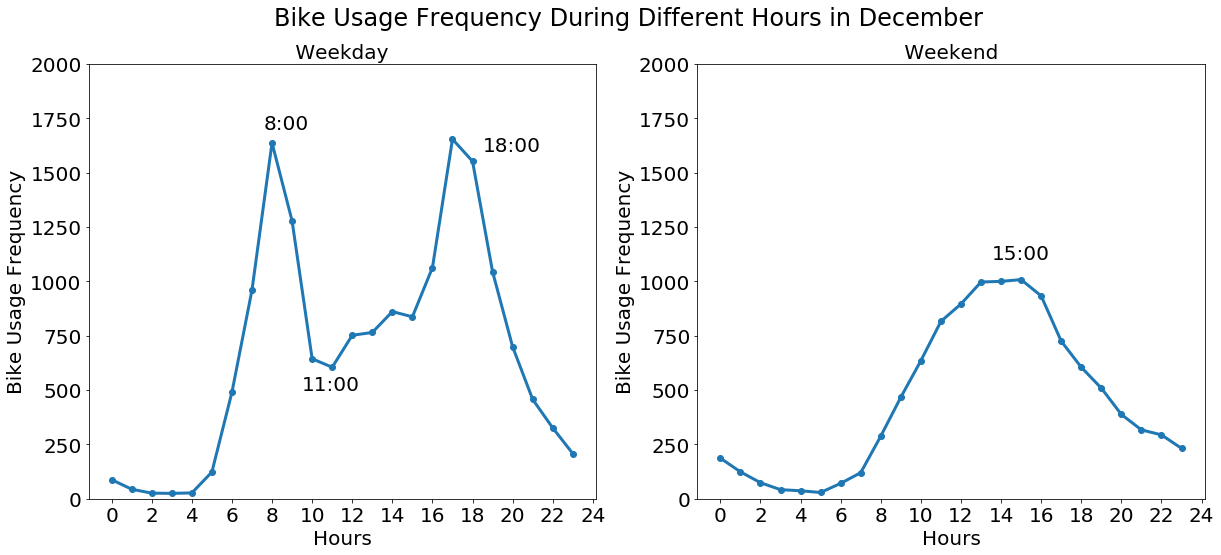

In [22]:
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
plt.plot( 'hour', 'averaged_count', data=bike_Dec_Mon_byhour, linestyle='-', marker='o',lw=3)
plt.locator_params(nbins=20, axis='x') #x axis tick more frequency
plt.xticks(fontsize=20) #set x tick font size
plt.yticks(fontsize=20)
plt.ylim((0,2000))
plt.xlabel("Hours",fontsize=20)
plt.ylabel("Bike Usage Frequency",fontsize=20)
#Bike Usage Frequency During Different Hours on Weekday in July
plt.title(" Weekday ",fontsize=20)
plt.annotate('8:00',xy=(1,1), xytext=(7.6,1700),fontsize=20
            )
plt.annotate('11:00',xy=(1,1), xytext=(9.5,500),fontsize=20
            )
plt.annotate('18:00',xy=(1,1), xytext=(18.5,1600),fontsize=20
            )
#plt.ylim((min(bike_July_Mon_byhour["averaged_count"].values),max(bike_July_Mon_byhour["averaged_count"].values)))
plt.subplot(1, 2, 2)
plt.plot( 'hour', 'averaged_count', data=bike_Dec_Sat_byhour, linestyle='-', marker='o',lw=3)
plt.locator_params(nbins=20, axis='x') 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.ylim((min(bike_July_Mon_byhour["averaged_count"].values),max(bike_July_Mon_byhour["averaged_count"].values)))
plt.ylim((0,2000))
plt.xlabel("Hours",fontsize=20)
plt.ylabel("Bike Usage Frequency",fontsize=20)
#Bike Usage Frequency During Different Hours on Weekends in July
plt.title(" Weekend ",fontsize=20)
plt.text(15, 1100, "15:00",
             fontsize=20, ha='center')

#plt.annotate('10:00',xy=(1,1), xytext=(9.5,1800),fontsize=20   #don't know why plt.annotate does not work for second plot
 #           )
#plt.annotate('18:00',xy=(1,1), xytext=(18,6000),fontsize=20
         #   )
fig = gcf()
fig.suptitle("Bike Usage Frequency During Different Hours in December", fontsize=24)
plt.show()

From the previous analysis of monthly bike usage, we find a significant difference in bike usage between winter and summer time. So here, we are also interested in whether the bike usage pattern during one day is also different between winter and summer. So here, we perform the similar analysis for weekdays and weekends in December. The result highly resembles that in July, with double peaks on weekdays and single peak on weekend. The peak times are also the same in these two months. The only difference is the amount of bike usage is much smaller in December (nearly half) than in November.


__To sum up__, the bike usage patterns during one day are quite different between weekdays and weekends, but are quite similar in winter and summer. For sharing bike system operators, the results imply a large proportion of bike usage attributed to work commute. So in rush hours on weekdays, it’s better to prepare for more bike usage and faster reallocations. 
<br>

# 2. Analysis of Trip Duration
<br>
In the most common arrangement for sharebikes, customers can rent a bike from an automated "dock" and return it later to any other dock in the New York city. The charge for the customer is based on how long they used the bike, that is "trip duration". <br>Continually, we'd like to find whether some patterns exist in __trip duration__.



### Trip duration in different months:

* Take July and December to represent Summer and Winter

### Trip duration on different days:

* Take _All_ Modays and Saturdays in a month to represent Weekdays and Weekends

### Trip duration in different parts of one day:

* Devide one day into six parts: Dawn, Early morning, Mid morning, Afternoon, Evening and Night.

        * Dawn: 0am~4am;
        * Early Morning: 4am~8am;
        * Mid Morning: 8am~12am;
        * Afternoon: 12am~4pm;
        * Evening: 4pm~8pm;
        * Night: 8pm~0am
   

In [82]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import glob,os
import os
print(os.getcwd())

C:\Users\Nicole


Glance of data frame we are analyzing:

In [57]:
bikedata_7 = pd.read_csv("C://Users/Nicole/Downloads/201407-citibike-tripdata/2014-07 - Citi Bike trip data.csv")
bikedata_12 = pd.read_csv("C://Users/Nicole/Downloads/201412-citibike-tripdata/201412-citibike-tripdata.csv")
bikedata_7.head()
bikedata_12.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1257,12/1/2014 00:00:28,12/1/2014 00:21:25,475,E 16 St & Irving Pl,40.735243,-73.987586,521,8 Ave & W 31 St,40.750450,-73.994811,16047,Customer,NaN,0
1,275,12/1/2014 00:00:43,12/1/2014 00:05:18,498,Broadway & W 32 St,40.748549,-73.988084,546,E 30 St & Park Ave S,40.744449,-73.983035,18472,Subscriber,1988.0,2
2,450,12/1/2014 00:01:22,12/1/2014 00:08:52,444,Broadway & W 24 St,40.742354,-73.989151,434,9 Ave & W 18 St,40.743174,-74.003664,19589,Subscriber,1983.0,1
3,1126,12/1/2014 00:02:17,12/1/2014 00:21:03,475,E 16 St & Irving Pl,40.735243,-73.987586,521,8 Ave & W 31 St,40.750450,-73.994811,21142,Customer,NaN,0
4,331,12/1/2014 00:02:21,12/1/2014 00:07:52,519,Pershing Square North,40.751873,-73.977706,527,E 33 St & 2 Ave,40.744023,-73.976056,18679,Subscriber,1986.0,2


First, we extract the date in column "starttime" to convert it to weekday as a new column "startweekday":

In [58]:
bikedata_7["startdate"]=bikedata_7.starttime.str.split().str.get(0)
bikedata_7["starttime2"]=bikedata_7.starttime.str.split().str.get(1)
bikedata_7["starthour"]=bikedata_7.starttime2.str.split(":").str.get(0)

bikedata_12["startdate"]=bikedata_12.starttime.str.split().str.get(0)
bikedata_12["starttime2"]=bikedata_12.starttime.str.split().str.get(1)
bikedata_12["starthour"]=bikedata_12.starttime2.str.split(":").str.get(0)

bikedata_7['startdate'] =  pd.to_datetime(bikedata_7['startdate'], format='%Y-%m-%d')
bikedata_12['startdate'] =  pd.to_datetime(bikedata_12['startdate'], format='%m/%d/%Y')

bikedata_7['startweekday'] = bikedata_7['startdate'].apply(lambda x: x.weekday())
bikedata_12['startweekday'] = bikedata_12['startdate'].apply(lambda x: x.weekday())

Then, we extract the time in column "starttime" to convert it to different parts of a day as a new column "partofday":

In [59]:
bikedata_7.starthour = pd.to_numeric(bikedata_7.starthour)
bikedata_12.starthour = pd.to_numeric(bikedata_12.starthour)
def label_time (row):
    if row['starthour'] in range(0,4):
        return 'A.Dawn(0am-4am)'
    if row['starthour'] in range(4,8):
        return 'B.Early Morning(4am-8am)'
    if row['starthour'] in range(8,12):
        return 'C.Mid Morning(8am-12am)'
    if row['starthour'] in range(12,16):
        return 'D.Afternoon(12am-4pm)'
    if row['starthour'] in range(16,20):
        return 'E.Evening(4pm-8pm)'
    return 'F.Night(8pm-12pm)'

bikedata_7.assign(partofday=" ")
bikedata_7['partofday'] = bikedata_7.apply (lambda row: label_time (row),axis=1)
bikedata_12.assign(partofday=" ")
bikedata_12['partofday'] = bikedata_12.apply (lambda row: label_time (row),axis=1)

The converted new data frame:

In [63]:
bikedata_7.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,startdate,starttime2,starthour,startweekday,partofday
0,404,2014-07-01 00:00:04,2014-07-01 00:06:48,545,E 23 St & 1 Ave,40.736502,-73.978095,402,Broadway & E 22 St,40.740343,-73.989551,19578,Subscriber,1987,2,2014-07-01,00:00:04,0,1,A.Dawn(0am-4am)
1,850,2014-07-01 00:00:06,2014-07-01 00:14:16,238,Bank St & Washington St,40.736197,-74.008592,458,11 Ave & W 27 St,40.751396,-74.005226,19224,Subscriber,1987,1,2014-07-01,00:00:06,0,1,A.Dawn(0am-4am)
2,1550,2014-07-01 00:00:21,2014-07-01 00:26:11,223,W 13 St & 7 Ave,40.737815,-73.999947,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,17627,Subscriber,1973,2,2014-07-01,00:00:21,0,1,A.Dawn(0am-4am)
3,397,2014-07-01 00:00:29,2014-07-01 00:07:06,224,Spruce St & Nassau St,40.711464,-74.005524,2008,Little West St & 1 Pl,40.705693,-74.016777,15304,Subscriber,1982,1,2014-07-01,00:00:29,0,1,A.Dawn(0am-4am)
4,609,2014-07-01 00:00:37,2014-07-01 00:10:46,346,Bank St & Hudson St,40.736529,-74.006180,521,8 Ave & W 31 St,40.750450,-73.994811,20062,Subscriber,1972,2,2014-07-01,00:00:37,0,1,A.Dawn(0am-4am)


extract Mondays and Saturdays of the whole month:

In [64]:
bikedata_7_weekday = bikedata_7[bikedata_7.startweekday==0]
bikedata_7_weekends = bikedata_7[bikedata_7.startweekday==5]
bikedata_12_weekday = bikedata_12[bikedata_12.startweekday==0]
bikedata_12_weekends = bikedata_12[bikedata_12.startweekday==5]

# 2.1 Trip Duration in July

##   Trip Duration on Weekdays

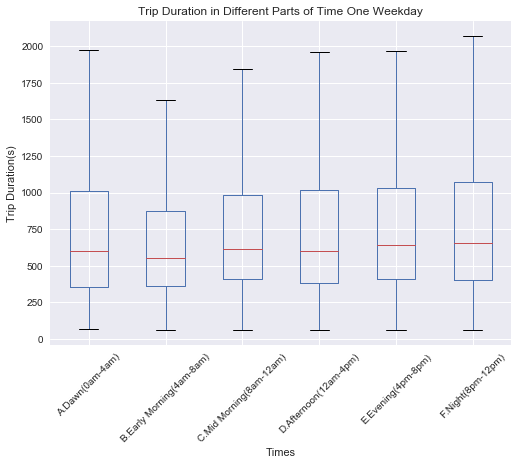

In [85]:
ax1 = bikedata_7_weekday.boxplot(by = "partofday", column = "tripduration",rot=45,showfliers=False,figsize=(8,6))
ax1.set(title = "Trip Duration in Different Parts of Time One Weekday", xlabel = "Times", ylabel = "Trip Duration(s)")
b = ax1.get_figure().suptitle("")

We have set the boxplot to show no outliers.
<br>
In total, the trip duration for users is approximately from __1__ minute to __35__ minutes. __Most__ people use bikes from __5-20__ minutes. The boxplot suggests no significant difference in trip duration in different parts of time one weekday in July. The spread of trip duration in time period 4am to 8am is shortest and in time period 8pm to 12pm is longest.
<br><br>
The outcome of data set is reasonable, since most people use sharebikes as a commuting traffic on weekdays. Usually they spend no more than 20 minutes and the share bikes meet the expectation of convenience and quickness.

## Trip Duration on Weekends

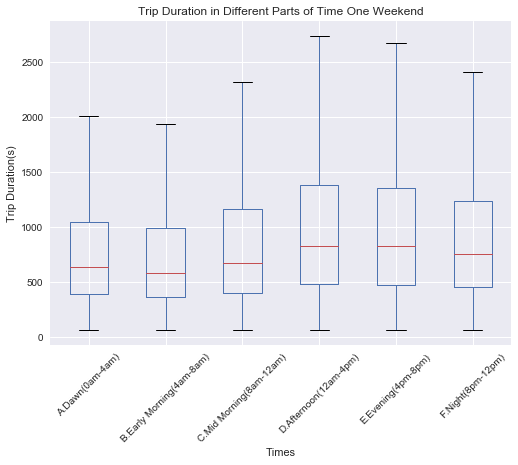

In [78]:
ax2 = bikedata_7_weekends.boxplot(by = "partofday", column = "tripduration",showfliers=False,rot=45,figsize=(8,6))
ax2.set(title = "Trip Duration in Different Parts of Time One Weekend", xlabel = "Times", ylabel = "Trip Duration(s)")
b2 = ax2.get_figure().suptitle("")

The distribution of trip duration on weekends is different from that on weekdays.<br>
1. The trip duration spread larger than that on weekdays. 
<br>
In total, the trip duration for users is approximately from __1__ minute to __45__ minutes. __Most__ people use bikes from __10-25__ minutes. The trip duration is slightly longer than that on weekdays.
<br>
2. The trip duration in different parts of time has a pattern. 
<br>
We could clearly see that the spread in trip duration during afternoon and evening is larger than other periods. And the spread in trip duration for dawn and early morning is the shortest.
<br><br>
The changes all make sense, since users use sharebikes on weekends for other purposes rather than commuting. Their active hours also change to afternoon and evening(12am to 8pm). People usually go out during afternoon to relax and have fun on weekends.

# 2.2 Trip Duration in December

##  Trip Duration on Weekdays

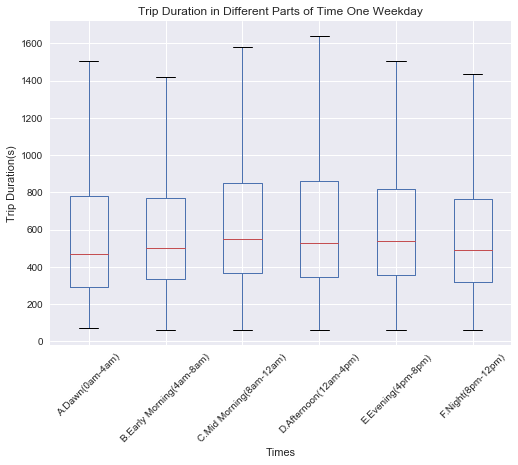

In [79]:
ax3 = bikedata_12_weekday.boxplot(by = "partofday", column = "tripduration",rot=45,showfliers=False,figsize=(8,6))
ax3.set(title = "Trip Duration in Different Parts of Time One Weekday", xlabel = "Times", ylabel = "Trip Duration(s)")
b3 = ax3.get_figure().suptitle("")

Similarly to what we found in July: The boxplot suggests no significant difference in trip duration in different parts of time one weekday in December.The spread of trip duration in time period 4am to 8am is shortest.
<br><hr>
However, there is a little change:
1. The logest spread in trip duration change to period 12am to 4pm.
2. In total, the trip duration for users decreases compared to that of summer.
The trip duration is approximately from __a few__ minutes to __30__ minutes. __Most__ people use bikes from __5-15__ minutes. 
<br><br>
Since December is much colder than July in New York, most people use sharebikes for shorter time duration. Also, winter gets dark earlier than summer, people's active time change to afternoon rather than night.

## Trip Duration on Weekends

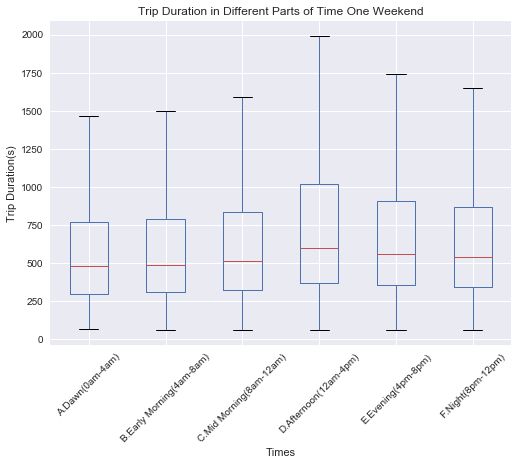

In [80]:
ax4 = bikedata_12_weekends.boxplot(by = "partofday", column = "tripduration",showfliers=False,rot=45,figsize=(8,6))
ax4.set(title = "Trip Duration in Different Parts of Time One Weekend", xlabel = "Times", ylabel = "Trip Duration(s)")
b4 = ax4.get_figure().suptitle("")

Similarly to what we found in July: 
1. The trip duration spread larger than that on weekdays in December. 
<br>
In total, the trip duration for users is approximately from __1__ minute to __35__ minutes. __Most__ people use bikes from __5-17__ minutes. The trip duration is slightly longer than that on weekdays.
<br>
2. The trip duration in different parts of time has a pattern. 
<br>
We could clearly see that the spread in trip duration during afternoon and evening is larger than other periods. And the spread in trip duration for dawn and early morning is the shortest.
<br><br>
However, there is a little change:
<br>
In total, the trip duration for users decreases compared to that of summer.


<br><br>
Based on the comparisons of trip duration in different time period, we conclude that:
* In summer, trip duration for users is longer than that in winter.
* Users use longer time during night in summer while use longer time during afternoon in winter.
* On weekends, trip duration for users is longer than that in winter.
* Users use sharebikes usually no more than 1 hour.
<hr><hr>
* Based on patterns we found on trip duration in different parts of one day, different days of one week and different months of one year, we could reallocation bike recourses and optimize business management. For example, bike share company could change prices of using bikes in different time period of day, week and year.

# 3. Analysis of Users
<br>
Finding the pattern of bike users is always the great concern for operator, since it’s important to know how to improve the user experience and maximize profit accordingly. 
<br><br>
Here, we focus on the following two parts:

### Age distribution of users:

* Set every ten year as an age group.

### Gender distribution of users:

* Data set records the gender of users(unknown-0, male-1,female-2).



# 3.1 Age Distribution of Users

Combine the datasets of all months in 2014:

In [94]:
path = r'C://Users/Nicole/Downloads/2014-citibike-tripdata'                    
allfiles = glob.glob(os.path.join(path, "*.csv"))    
eachfile = (pd.read_csv(f) for f in allfiles)
con_file   = pd.concat(eachfile, ignore_index=True)
con_filenew = pd.to_numeric(con_file['birth year'], errors='coerce')
con_filenew = con_filenew.dropna(axis=0, how='any')

Devide the age into different groups, form 00's to 90's.

In [95]:
User00s = sum(con_filenew.between(1899,1909))
User10s = sum(con_filenew.between(1910,1919))
User20s = sum(con_filenew.between(1920,1929))
User30s = sum(con_filenew.between(1930,1939))
User40s = sum(con_filenew.between(1940,1949))
User50s = sum(con_filenew.between(1950,1959))
User60s = sum(con_filenew.between(1960,1969))
User70s = sum(con_filenew.between(1970,1979))
User80s = sum(con_filenew.between(1980,1989))
User90s = sum(con_filenew.between(1990,1999))
age = {"User00s-30s":User00s+User10s+User20s+User30s,"User40s":User40s,"User50s":User50s,"User60s":User60s,"User70s":User70s,"User80s":User80s,"User90s":User90s}

Table of numbers for different age groups:

In [96]:
age_s =pd.Series(age,name='number')
age_s.index.name='age'
age_s.reset_index()

,age,number
0,User00s-30s,10091
1,User40s,107793
2,User50s,589875
3,User60s,1299812
4,User70s,1886169
5,User80s,2819556
6,User90s,574208


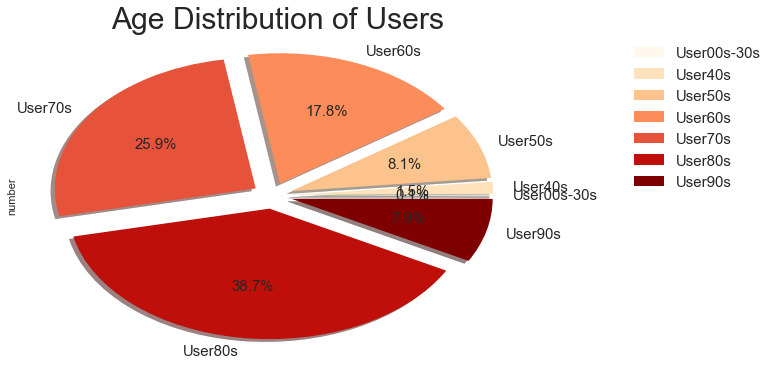

In [90]:
age_s.plot.pie(legend=True,figsize=(9,6),explode = ( 0.1 ,0.1 ,0.1 ,0.1 ,0.1 ,0.1 ,0.1), autopct='%1.1f%%',fontsize=15,shadow = True,colormap = 'OrRd',labeldistance=1.1)
plt.figtext(.52,.89,'Age Distribution of Users', fontsize=30, ha='center')
plt.legend(loc="upper right",bbox_to_anchor=(1.5,1),fontsize=15)

In the pie chart, we divide age into seven groups and they are 00s-30s, 40s, 50s, 60s, 70s, 80s and 90s. Since users from 00s to 30s is a super small group, we combine them together.
<br>
It is clearly shown that the largest users group is 80s and the proportion is 38.7%. The majority of bike users are70s and 80s, since they account for more than one half of all the users in 2014. 

# 3.2 Gender Distribution of Users

Table of numbers for different gender groups:

In [97]:
unknown = sum(con_file['gender']==0)
male = sum(con_file['gender']==1)
female = sum(con_file['gender']==2)
gender = {"unknown": unknown, "male": male,"female":female}
gender_s = pd.Series(gender,name='number')
gender_s.index.name='gender'
gender_s.reset_index()

,gender,number
0,female,1650274
1,male,5635962
2,unknown,794980


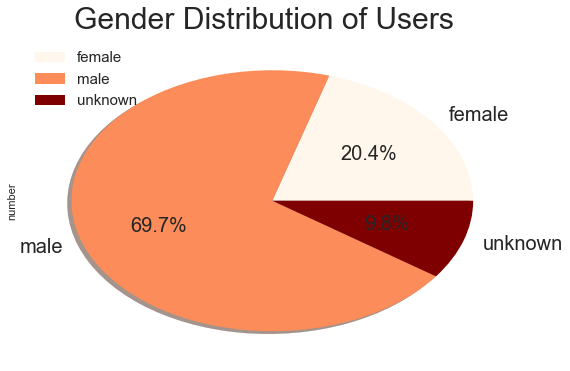

In [91]:
gender_s.plot.pie(legend=True,figsize=(9,6),explode = (0, 0, 0), autopct='%1.1f%%', shadow=True,colormap="OrRd",fontsize=20)
plt.figtext(.5,.9,'Gender Distribution of Users', fontsize=30, ha='center')
plt.legend(loc="best",fontsize=15)

The proportion of male users reaches 69.7%, more than 2/3 of all users. It is a relative large proportion. 
<br><br>
* Based on distribution of age and gender for users, we get two important conclusions:
1. Users 70s and 80s are the majority of bike sharing users in 2014.
2. Male users are the majority of bike sharing users in 2014.
<br><br>
* Therefore, bike sharing system could carry out some patronage to the majority users and attract more users accordingly. 

# 4. Analysis of Station Location and Usage

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import sqlite3 as sql
import seaborn as sns
import numpy as np
import geopandas as gpd
import osmnx as ox    
import shapely.geometry as geom 

In [2]:
jan=pd.read_csv("dataset1/2014-01 - Citi Bike trip data.csv")
feb=pd.read_csv("dataset1/2014-02 - Citi Bike trip data.csv")
mar=pd.read_csv("dataset1/2014-03 - Citi Bike trip data.csv")
apr=pd.read_csv("dataset1/2014-04 - Citi Bike trip data.csv")
may=pd.read_csv("dataset1/2014-05 - Citi Bike trip data.csv")
jun=pd.read_csv("dataset1/2014-06 - Citi Bike trip data.csv")
jul=pd.read_csv("dataset1/2014-07 - Citi Bike trip data.csv")
aug=pd.read_csv("dataset1/2014-08 - Citi Bike trip data.csv")
sep=pd.read_csv("dataset1/201409-citibike-tripdata.csv")
octo=pd.read_csv("dataset1/201410-citibike-tripdata.csv")
nov=pd.read_csv("dataset1/201411-citibike-tripdata.csv")
dec=pd.read_csv("dataset1/201412-citibike-tripdata.csv")

In [3]:
def lowercase(month):
    month.columns=[x.lower() for x in month.columns]
    month.rename(columns={'bike id':'bikeid','start time':'starttime','stop time':'stoptime',
                               'trip duration':'tripduration','user type':'usertype'})
    return month

In [4]:
jan=lowercase(jan)
feb=lowercase(feb)
mar=lowercase(mar)
apr=lowercase(apr)
may=lowercase(may)
jun=lowercase(jun)
jul=lowercase(jul)
aug=lowercase(aug)
sep=lowercase(sep)
octo=lowercase(octo)
nov=lowercase(nov)
dec=lowercase(dec)

In [5]:
data=pd.concat([jan,feb,mar,apr,may,jun,jul,aug,sep,octo,nov,dec],axis=0)

In [6]:
nyc=gpd.read_file("./summary_city_council_districts_shapefile/summary_city_council_districts.shp")
nyc.crs

{'init': 'epsg:4326'}

In [7]:
nyc1=gpd.read_file("./nycb2010_18a/nycb2010.shp")
nyc1.crs

{'datum': 'NAD83',
 'lat_0': 40.16666666666666,
 'lat_1': 40.66666666666666,
 'lat_2': 41.03333333333333,
 'lon_0': -74,
 'no_defs': True,
 'proj': 'lcc',
 'units': 'us-ft',
 'x_0': 300000,
 'y_0': 0}

In [8]:
start_station = data.iloc[:,[3, 4, 5, 6]] 
start_station.index = start_station['start station id']
start_station = start_station.drop_duplicates()
count_start_station = data.groupby('start station id')['start station id'].count()
start_station['count'] = count_start_station
start_station=start_station.rename(columns={'start station latitude':'start_lat','start station longitude':'start_lon'})

In [9]:
utm_crs = '+proj=utm +zone=10 +ellps=GRS80 +datum=NAD83 +units=m +no_defs '
nyc1_proj= nyc1.to_crs(utm_crs)
lonlat_start= [geom.Point(x) for x in zip(start_station.start_lon , start_station.start_lat)]
start_station=gpd.GeoDataFrame(start_station, geometry=lonlat_start)
start_station.crs = '+init=epsg:4326'
start_proj=start_station.to_crs(utm_crs)

Text(0.5,1,'stations distribution in NYC')

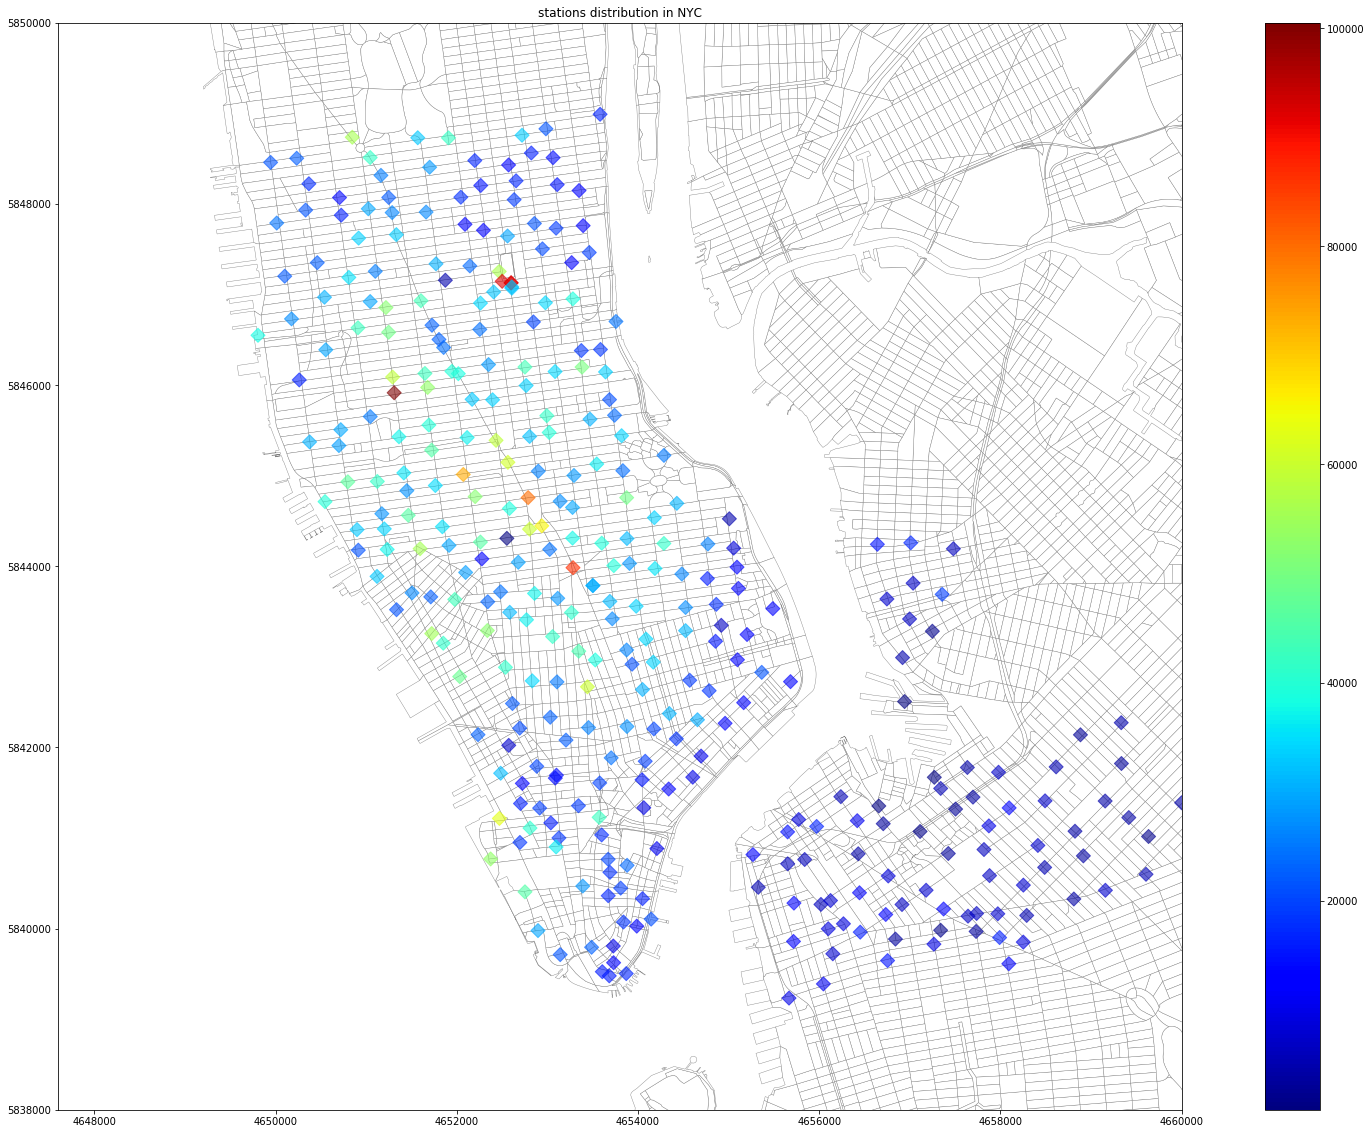

In [10]:
plt.rcParams['figure.figsize'] = (30, 20)
lonlat_start= [geom.Point(x) for x in zip(start_station.start_lon , start_station.start_lat)]
start_station=gpd.GeoDataFrame(start_station, geometry=lonlat_start)
base = nyc1_proj.plot(color = "white", edgecolor = "gray",linewidth = 0.4)
start_proj.plot(ax=base, column='count',cmap='jet', marker='D',markersize=100,alpha=.6,legend=True)
base.set_xlim([4647600, 4660000])
base.set_ylim([5838000, 5850000])
plt.title('stations distribution in NYC')

In [12]:
import folium
start_station_map = folium.Map(location = [40.74, -73.99], width = 900, height = 800,
                               tiles="CartoDB dark_matter",
                               zoom_start=12)
for index, row in start_station.iterrows():
    count = row["count"]
    radius = count/10000
    if count<10000:
        color="#FFFF00" # yellow
    elif count<20000:
        color="#C0C0C0" # silver
    else:
        color="#FFA500" # orange
    
    folium.CircleMarker(location = [row['start_lat'],
                                    row['start_lon']],
                                    popup = row['start station name'], 
                                    radius = radius,
                                    color = color,fill=True).add_to(start_station_map)

In [14]:
start_station_map.save("start_station.html")

At last, we made 2 heat maps to notify the usage frequencies of each station, one map is static, the other one is interactive. We save the interactive map as `start_station.html`.

For the static map, every dot denotes a station, and if the color is more inclined to be red, then the more frequency of usage occurred in the station.But we don't know the name of the stations, although we can see some pattern. So, we use an interactive map. 

This interactive map provides overall information about the bike share stations and their locations. We use 3 colors to identify the rough range of frequencies: Yellow for usage frequency less than 10000, Silver for usage frequency between 10000 and 20000, Orange for usage frequency larger than 20000. Clicking on each marker brings a pop-up with the station location. From the map, we can see that the midtown, east village and lower Manhattan have more usages, but as for the lower east side and Brooklyn, the amount of usages are less. The two busiest stations are near 8 Ave & W 31 St and Pershing Square North.